In [7]:
import carve
import numpy as np
import matplotlib.pyplot as plt
import skimage
import plot
import librosa

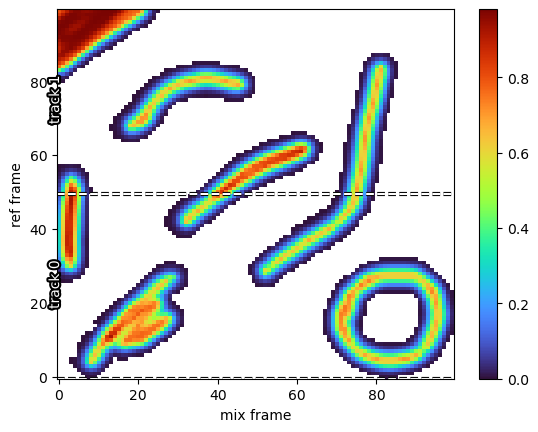

In [8]:
H = skimage.io.imread("/data5/anasynth_nonbp/andre/test.png", as_gray=True)
H = skimage.util.img_as_float(H)
H = 1 - H
H = skimage.transform.rotate(H, 90)
split_idx = [0, H.shape[0]//2, H.shape[0]]
im=plot.plot_H(H, split_idx)
plt.colorbar(im)

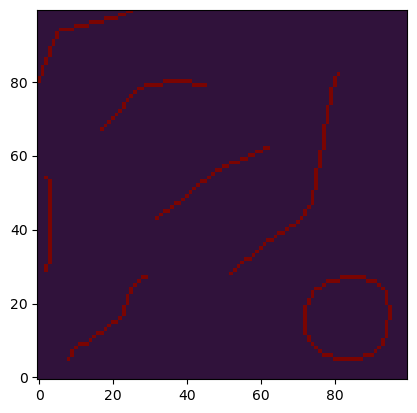

In [9]:
H_skel= skimage.morphology.skeletonize(H)
plt.imshow(H_skel, origin="lower", cmap="turbo")
plt.colorbar(im)

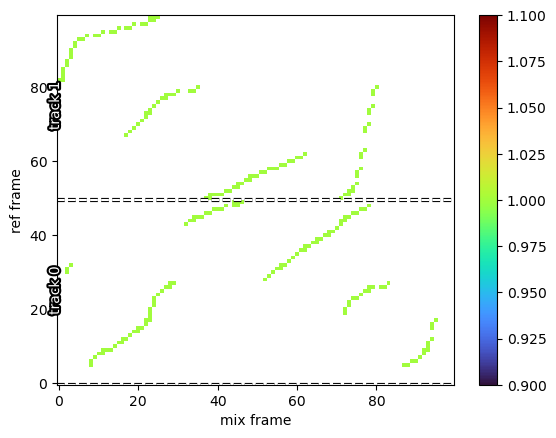

In [10]:
H_skel = H_skel.astype(float)
H_blur = carve.line_enhance(H, split_idx, 3, 2, 51, "hann")
im=plot.plot_H(H_blur, split_idx)
plt.colorbar(im)

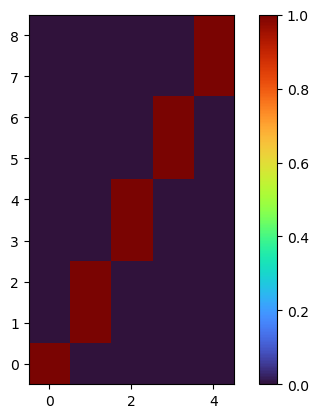

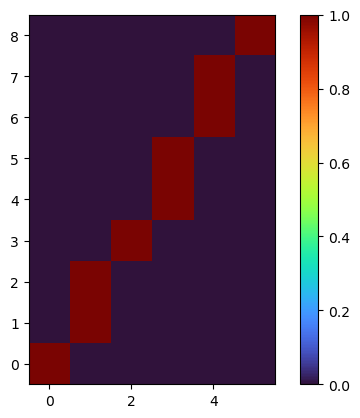

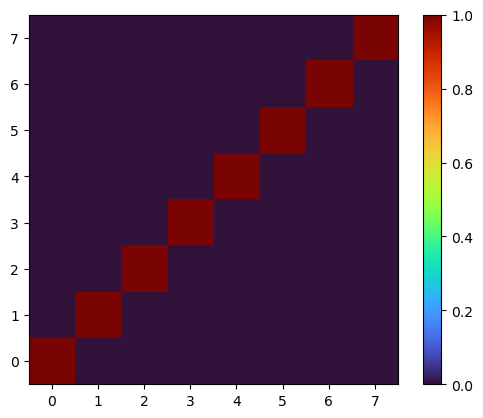

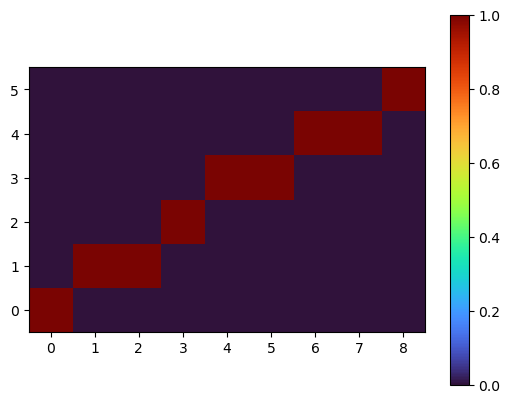

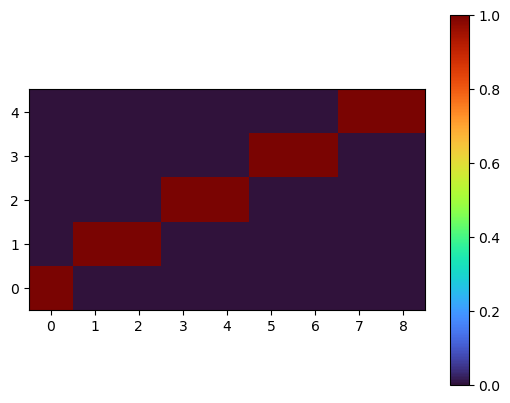

In [11]:
n = 10
max_slope = 2
min_slope= 1/max_slope
n_filters = 5
for slope in np.logspace(
            np.log2(min_slope), np.log2(max_slope), num=n_filters, base=2
        ):
    angle = np.arctan(slope)
    x = int(n *np.cos(angle))
    y = int(n *np.sin(angle))
    ker = np.zeros((x+1,y+1))
    rr,cc = skimage.draw.line(0,0,x,y)
    ker[rr,cc] = 1
    plt.imshow(ker, origin="lower", cmap='turbo')
    plt.colorbar()
    plt.show()